In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df.head(5)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


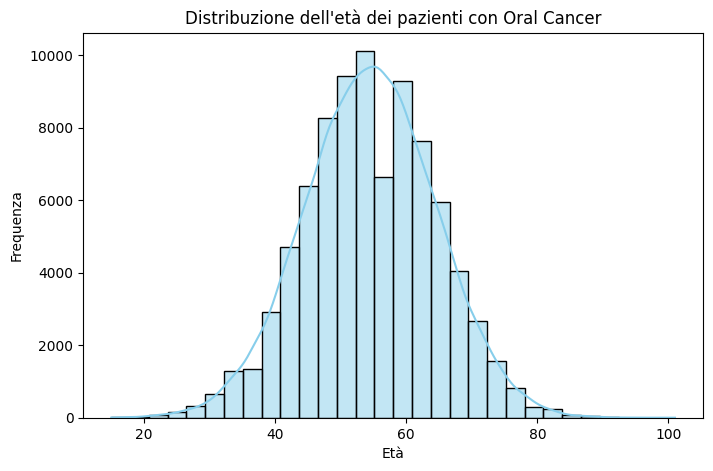

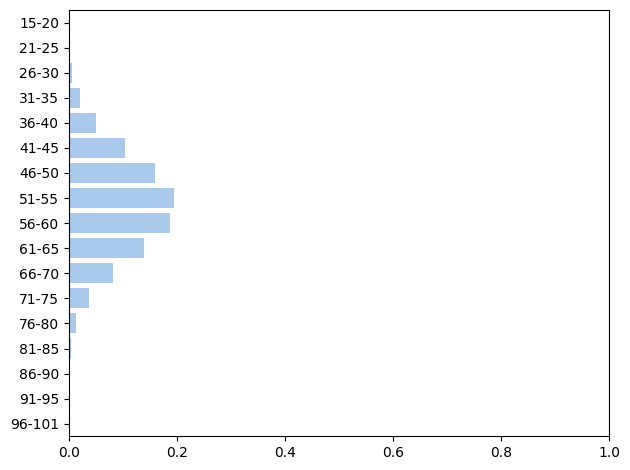

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Distribuzione dell'età dei pazienti con Oral Cancer")
plt.xlabel("Età")
plt.ylabel("Frequenza")
plt.show()



max_age = df["Age"].max()
min_age = df["Age"].min() 


range_df = df["Age"].value_counts(bins=17, normalize=True).sort_index()
range_df.index = [f"{int(np.ceil(iv.left))}-{int(iv.right)}" for iv in range_df.index]
sns.set_color_codes("pastel")
sns.barplot(x= range_df.values, y= [str(x) for x in range_df.index], orient='h', color="b")
plt.xlabel('')  
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()



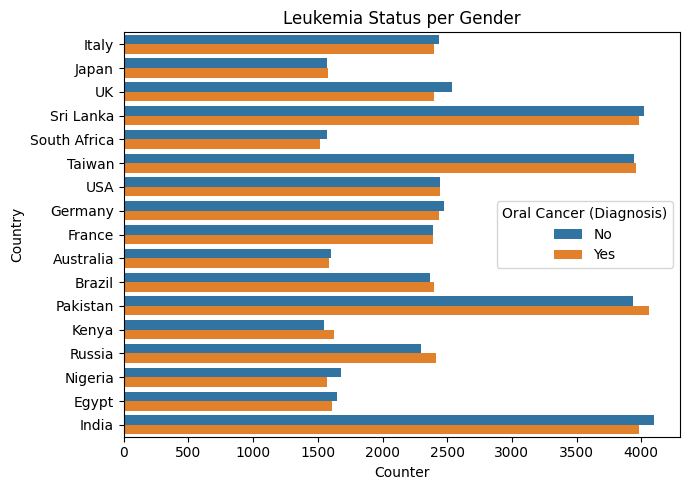

In [13]:
plt.figure(figsize=(7,5))

sns.countplot(
    data=df,
    y="Country",             
    hue="Oral Cancer (Diagnosis)",
    orient="h"
)

plt.title("Leukemia Status per Gender")
plt.xlabel("Counter")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

/var/folders/6_/rzvng5pn14z9kc8qw_hjns_40000gn/T/ipykernel_2804/455973101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancer Stage", y="Tumor Size (cm)", palette="Set2")


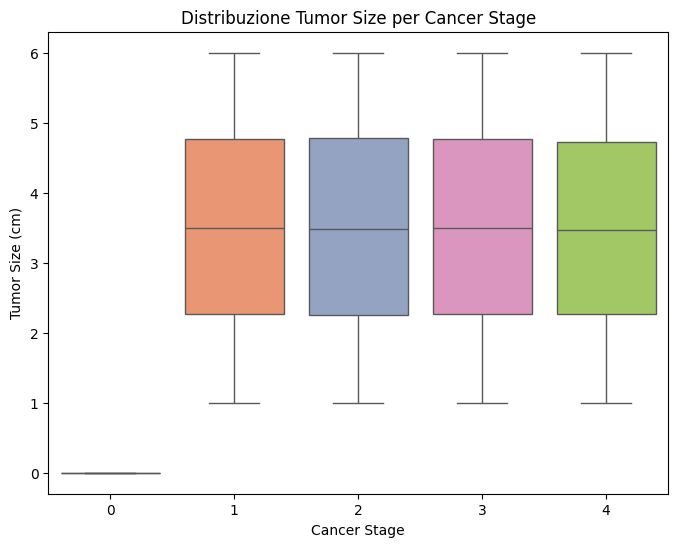

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Cancer Stage", y="Tumor Size (cm)", palette="Set2")
plt.title("Distribuzione Tumor Size per Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (cm)")
plt.show()

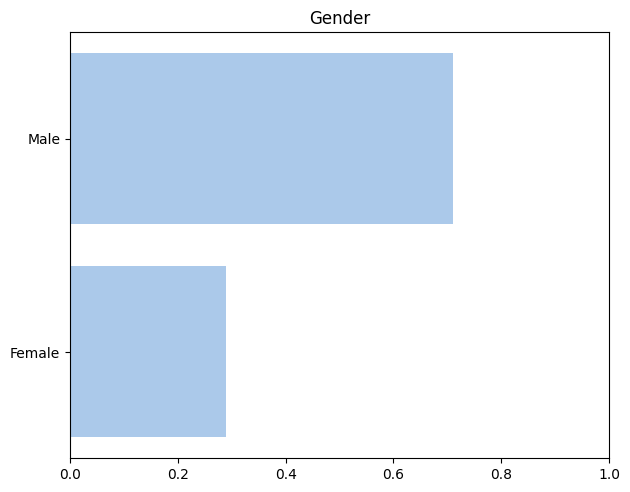

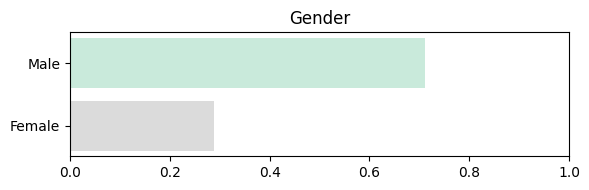

In [8]:
col = "Gender"
serie = df[col].value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.title(col)
plt.show()

# Matplotlib equivalente al grafico seaborn precedente
fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
labels = list(serie.index)
values = list(serie.values)
y_pos = np.arange(len(labels))

# palette pastel
cmap = plt.get_cmap("Pastel2")
colors = [cmap(i / max(1, len(labels) - 1)) for i in range(len(labels))]

bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # mantengo ordine simile a seaborn
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim(0, 1.0)
ax.set_title(col)
plt.tight_layout()

plt.show()

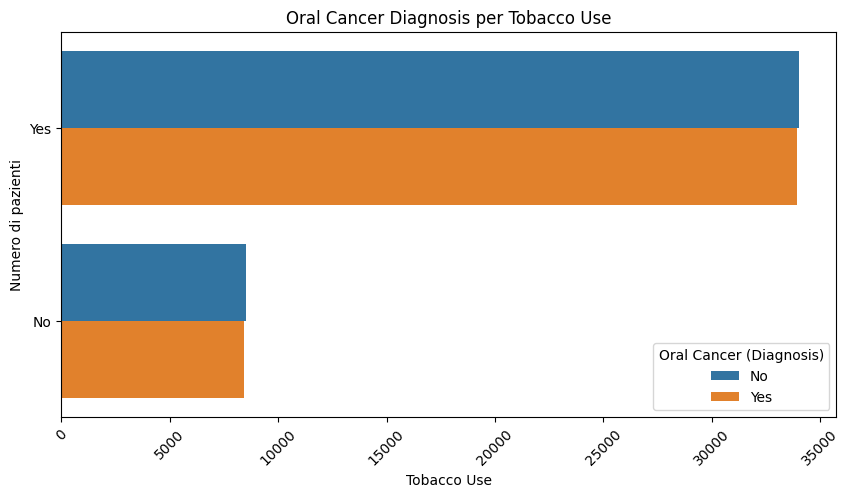

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Tobacco Use", hue="Oral Cancer (Diagnosis)", orient = "h")
plt.title("Oral Cancer Diagnosis per Tobacco Use")
plt.xticks(rotation=45)
plt.xlabel("Tobacco Use")
plt.ylabel("Numero di pazienti")
plt.show()






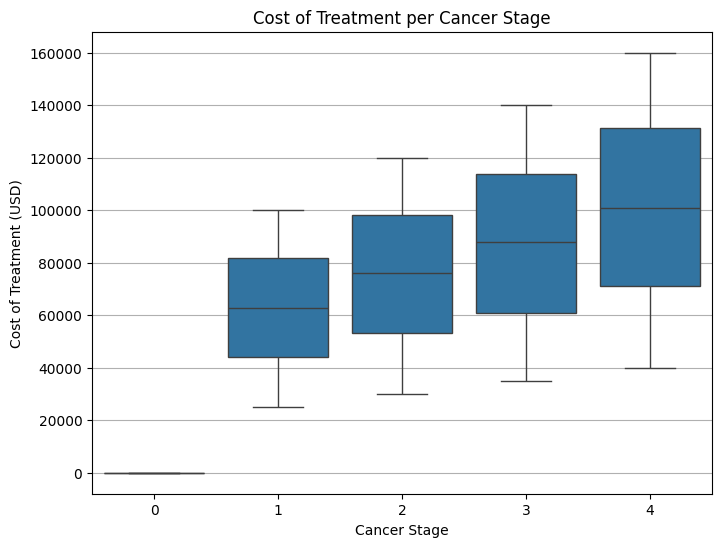

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Cancer Stage",
    y="Cost of Treatment (USD)"
)
plt.title("Cost of Treatment per Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Cost of Treatment (USD)")
plt.grid(True, axis="y")
plt.show()


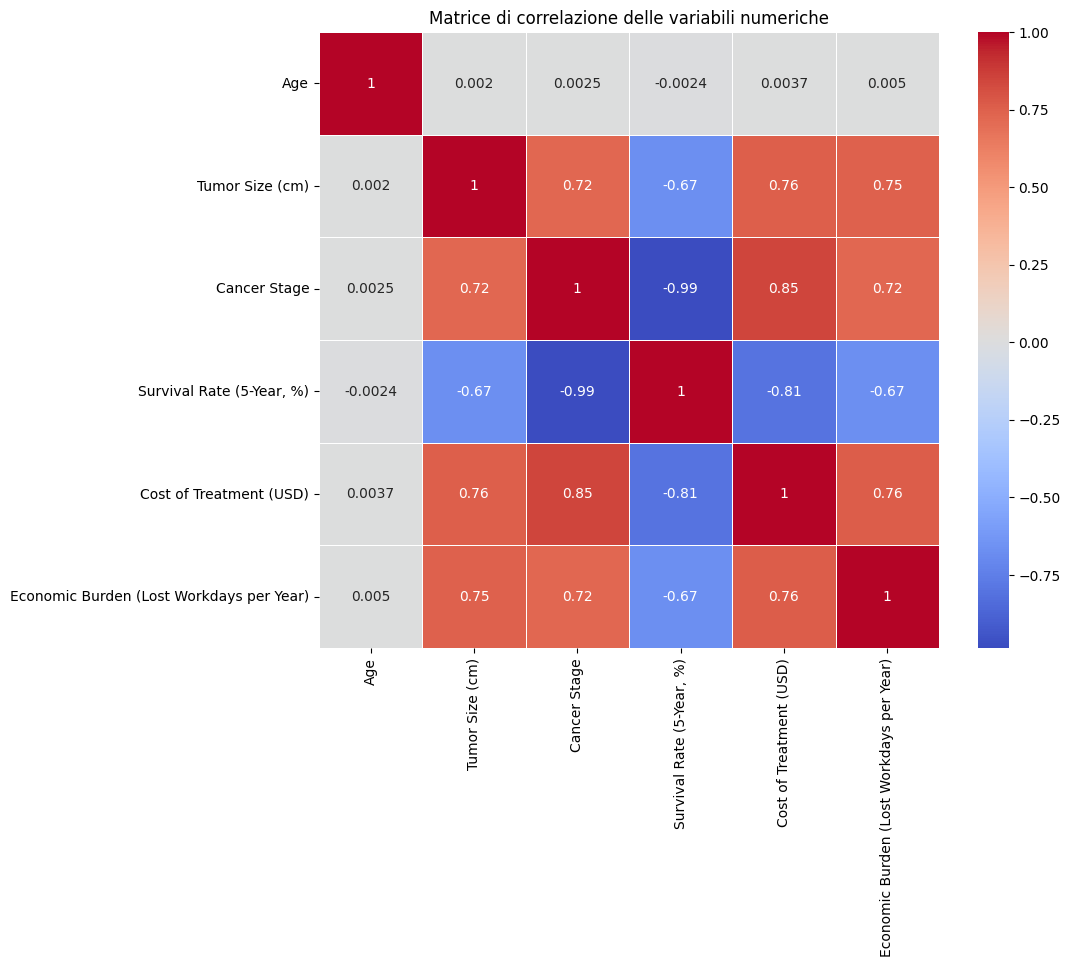

In [ ]:
num_cols = ["Age","Tumor Size (cm)","Cancer Stage","Survival Rate (5-Year, %)","Cost of Treatment (USD)","Economic Burden (Lost Workdays per Year)"]
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice di correlazione delle variabili numeriche")
plt.show()
